# Preprocess for Pupil Exploration Proj

Written by Haoxue Fan

Last updated: Aug 2022

The current jupyter notebook is to play around with Deshawn's data analysis code, and develop our own preprocess pipeline. 

In [1]:
import os
import pandas as pd
from glob import glob
from scipy.stats import zscore
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Before everything, let us read in csv file! 

---

## Process pre-processed data

Goal for this part of the code is to 

- run through all the data files and save a HUGE file for all the pupil_task.csv together!

Do not care whether they have made a decision or not now. Just to add the timestamp

In [2]:
import pandas as pd
from glob import glob
from itertools import compress
import pypil 

if not os.path.exists('../../Data_All_Cleaned/long_pupil_task.csv'):
    idx_max = 9999 # set this number to restrict analysis to a subset of all data (9999 is an arbitrary large number)

    part_dirs = sorted(glob('../../Real_Subject_Data/*/'))
    overwrite = False
    idx = 0

    long_pupil_task = pd.DataFrame()

    for data_dir in part_dirs:
        if idx <= idx_max:
            try:
                current_file = glob(data_dir + '*asc')[0]
                print(idx, 'Index of the current preprocessing j ob:')
                print('    ', current_file)
                pupil_data = pypil.pypil(current_file)
                pupil_data.read_data_ready2use()
                current_csv = pupil_data.merged_data_task
                current_csv['subjectNum'] = idx + 1
                long_pupil_task = pd.concat([long_pupil_task, current_csv], ignore_index=True)
                idx = idx + 1
            except Exception:
                continue
    # long_pupil_task.to_csv('../../Data_All_Cleaned/long_pupil_task.csv')





0 Index of the current preprocessing j ob:
     ../../Real_Subject_Data/264COY_(06-28-2022)/264COY_2022_06_28.asc


/Users/haoxuefan/Library/CloudStorage/OneDrive-HarvardUniversity/PupilExplore-Local/Code/preprocess/pypil.py:223: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  self.merged_data_task = pd.read_csv(os.path.join(self.data_dir, '{}_merged_pupil_task.csv'.format(self.subjectid)))


1 Index of the current preprocessing j ob:
     ../../Real_Subject_Data/29XXOO_(06-13-2022)/29XXOO_2022_06_13.asc
2 Index of the current preprocessing j ob:
     ../../Real_Subject_Data/34BRN8_(07-15-2022)/34BRN8_2022_07_15.asc
3 Index of the current preprocessing j ob:
     ../../Real_Subject_Data/42I6EI_(07-14-2022)/42I6EI_2022_07_14.asc
4 Index of the current preprocessing j ob:
     ../../Real_Subject_Data/4J0VS0_(06-23-2022)/4J0VS0_2022_06_23.asc
5 Index of the current preprocessing j ob:
     ../../Real_Subject_Data/7DL5I4_(06-14-2022)/7DL514_2022_06_14.asc
6 Index of the current preprocessing j ob:
     ../../Real_Subject_Data/7T9M4M_(06-28-2022)/7T9M4M_2022_06_28.asc


/Users/haoxuefan/Library/CloudStorage/OneDrive-HarvardUniversity/PupilExplore-Local/Code/preprocess/pypil.py:223: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  self.merged_data_task = pd.read_csv(os.path.join(self.data_dir, '{}_merged_pupil_task.csv'.format(self.subjectid)))


7 Index of the current preprocessing j ob:
     ../../Real_Subject_Data/80MSTS_(07-07-2022)/80MSTS_2022_07_07.asc
8 Index of the current preprocessing j ob:
     ../../Real_Subject_Data/8OX7U6_(06-15-2022)/8OX7U6_2022_06_15.asc
9 Index of the current preprocessing j ob:
     ../../Real_Subject_Data/9W0DJC_(07-01-2022)/9W0DJC_2022_07_01.asc
10 Index of the current preprocessing j ob:
     ../../Real_Subject_Data/A98DB9_(06-09-2022)/A98DB9_2022_06_09.asc
11 Index of the current preprocessing j ob:
     ../../Real_Subject_Data/AJA1KZ_(07-14-2022)/AJA1KZ_2022_07_14.asc
12 Index of the current preprocessing j ob:
     ../../Real_Subject_Data/BZR5YS_(07-14-2022)/BZR5YS_2022_07_14.asc
13 Index of the current preprocessing j ob:
     ../../Real_Subject_Data/CCV1AT_(07-11-2022)/CCV1AT_2022_07_11.asc
14 Index of the current preprocessing j ob:
     ../../Real_Subject_Data/CM1TZG_(06-23-2022)/CM1TZG_2022_06_23.asc


/Users/haoxuefan/Library/CloudStorage/OneDrive-HarvardUniversity/PupilExplore-Local/Code/preprocess/pypil.py:223: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  self.merged_data_task = pd.read_csv(os.path.join(self.data_dir, '{}_merged_pupil_task.csv'.format(self.subjectid)))


15 Index of the current preprocessing j ob:
     ../../Real_Subject_Data/CWYKY2_(06-30-2022)/CWYKY2_2022_06_30.asc
16 Index of the current preprocessing j ob:
     ../../Real_Subject_Data/DA2GA3_(06-14-2022)/DA2GA3_2022_06_14.asc
17 Index of the current preprocessing j ob:
     ../../Real_Subject_Data/DK88ZQ_(07-19-2022)/DK88ZQ_2022_07_19.asc
18 Index of the current preprocessing j ob:
     ../../Real_Subject_Data/DU5ZOC_(06-21-2022)/DU5ZOC_2022_06_21.asc
19 Index of the current preprocessing j ob:
     ../../Real_Subject_Data/EPSUO5_(07-18-2022)/EPSUO5_2022_07_18.asc
20 Index of the current preprocessing j ob:
     ../../Real_Subject_Data/ESCFOV_(06-22-2022)/ESCFOV_2022_06_22.asc
21 Index of the current preprocessing j ob:
     ../../Real_Subject_Data/FDT8PT_(06-16-2022)/FDT8PT_2022_06_16.asc


/Users/haoxuefan/Library/CloudStorage/OneDrive-HarvardUniversity/PupilExplore-Local/Code/preprocess/pypil.py:223: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  self.merged_data_task = pd.read_csv(os.path.join(self.data_dir, '{}_merged_pupil_task.csv'.format(self.subjectid)))


22 Index of the current preprocessing j ob:
     ../../Real_Subject_Data/FNZ0EF_(06-28-2022)/FNZ0EF_2022_06_28.asc
22 Index of the current preprocessing j ob:
     ../../Real_Subject_Data/GB0NP3_(07-08-2022)/GB0NP3_2022_07_08.asc
23 Index of the current preprocessing j ob:
     ../../Real_Subject_Data/HGK949_(07-12-2022)/HGK949_2022_07_12.asc
24 Index of the current preprocessing j ob:
     ../../Real_Subject_Data/N0WPBH_(06-17-2022)/N0WPBH_2022_06_17.asc
25 Index of the current preprocessing j ob:
     ../../Real_Subject_Data/NQ0XLV_(07-20-2022)/NQ0XLV_2022_07_20.asc
26 Index of the current preprocessing j ob:
     ../../Real_Subject_Data/OVJJA1_(06-13-2022)/OVJJA1_2022_06_13.asc
26 Index of the current preprocessing j ob:
     ../../Real_Subject_Data/QO4J04_(06-14-2022)/QO4J04_2022_06_14.asc
27 Index of the current preprocessing j ob:
     ../../Real_Subject_Data/QZ1BQR_(06-16-2022)/QZ1BQR_2022_06_16.asc
28 Index of the current preprocessing j ob:
     ../../Real_Subject_Data/RW8QQ1_

<span style="color:red">Output suggests that we have 36 participants' data. Those without data (i.e., index does not increase): FNZ0EF_(06-28-2022), UWQ7RD_(06-30-2022), VBGL6F_(07-08-2022).<\span>

<span style="color:red">Looking into decisionDiary, I realize that these are the people that have missing sample. We will potentially deal with this problem later.<\span>

---

## Process long_pupil_task

In [18]:
long_pupil_task.shape

(15403073, 43)

### Add a unique subject-block-trial identifier 

would be useful for future filtering data

In [9]:
long_pupil_task['identifier'] = long_pupil_task['ID'] + long_pupil_task['block'].astype(str) + long_pupil_task['trial'].astype(str)

### Remove irrelevant events 

In [19]:
timestep_event_list = ['fixation_onset','stimulus_pre_with_fixation_onset','stimulus_pre_green_fixation_onset','key_press','reward_pre_red_fixation_onset','early_key_press']
timestep_event_list_pattern = '|'.join(timestep_event_list)
long_pupil_task = long_pupil_task.loc[long_pupil_task.event.str.contains(timestep_event_list_pattern),:]

In [20]:
long_pupil_task.shape

(13302378, 43)

### Add time stamp 

Specifically, locked on the following events: fixation onset, option onset, choice onset, outcome onset

In [4]:
def calc_time_step(single_block_trial_df):
    '''
    function calculating different event locked time stamp
    generate new columns (one column for each event)
    '''
    first_row = single_block_trial_df.groupby('event').head(1)
    list_time_step = [single_block_trial_df.time - x for x in first_row.time]
    for i in range(len(list_time_step)):
        col_name = 'timestamp_locked_at_' + first_row.event.iloc[i]
        single_block_trial_df.loc[:,col_name] = list_time_step[i]
    return single_block_trial_df
                                                                                            


In [5]:
if (not 'timestamp_locked_at_fixation_onset' in long_pupil_task.columns):
    long_pupil_task = long_pupil_task.groupby(['ID','block','trial']).apply(calc_time_step)
    # long_pupil_task.to_csv('../../Data_All_Cleaned/long_pupil_task.csv')    
else:
    long_pupil_task = pd.read_csv('../../Data_All_Cleaned/long_pupil_task.csv')    


### Calcualte baseline & baseline corrected pupil size

Currently, we choose the [-1, 0] time period locked at fixation onset as baseline (i.e., between fixation onset and showing the options)

Note: the fixation length is uniformly distributed U[0,1] except for the first trial, which is U[3,4] (following Deshawn's advice)

**open to later discussion!**

In [28]:
baseline_timestamp_range = [-1000, 0]
def calc_trial_baseline(single_block_trial_df):
    trial_baseline_pupil = single_block_trial_df.loc[(single_block_trial_df.timestamp_locked_at_stimulus_pre_with_fixation_onset <= baseline_timestamp_range[1]) &\
                                                     (single_block_trial_df.timestamp_locked_at_stimulus_pre_with_fixation_onset >= baseline_timestamp_range[0]), 'smoothed_interp_pupil_corrected'].mean()
    single_block_trial_df['trial_baseline_pupil'] = trial_baseline_pupil
    return single_block_trial_df

In [34]:
if (not 'remove_baseline_smoothed_interp_pupil_corrected' in long_pupil_task.columns):
    long_pupil_task = long_pupil_task.groupby(['ID','block','trial']).apply(calc_trial_baseline)
    long_pupil_task['remove_baseline_smoothed_interp_pupil_corrected'] = long_pupil_task['smoothed_interp_pupil_corrected'] - long_pupil_task['trial_baseline_pupil']
    # long_pupil_task.to_csv('../../Data_All_Cleaned/long_pupil_task.csv')    
else:
    long_pupil_task = pd.read_csv('../../Data_All_Cleaned/long_pupil_task.csv')    



### Exclude data based on baseline

Mathot (2022) suggests visualizing baseline to see if it distribute relatively
normally. Besides, we could use zscore to decide which trial to exclude (within
participant, the criterion they give is +/-3 SD)

for now, this excluded 23 trials


In [56]:
long_pupil_task = long_pupil_task.loc[~long_pupil_task.trial_baseline_pupil.isna(),:]
long_pupil_task.shape

(13258781, 46)

In [4]:
def zscore_func_sub(df):
    df['z_trial_baseline_pupil'] = zscore(df['trial_baseline_pupil'])
    return df

In [10]:
long_pupil_task_first_row = long_pupil_task.groupby(['ID','block','trial']).head(1)
long_pupil_task_first_row = long_pupil_task_first_row.groupby(['ID']).apply(zscore_func_sub)

In [12]:
print((abs(long_pupil_task_first_row.z_trial_baseline_pupil) >= 3).mean())
print((abs(long_pupil_task_first_row.z_trial_baseline_pupil) >= 2).mean())

0.00435464204842362
0.04337223480229925


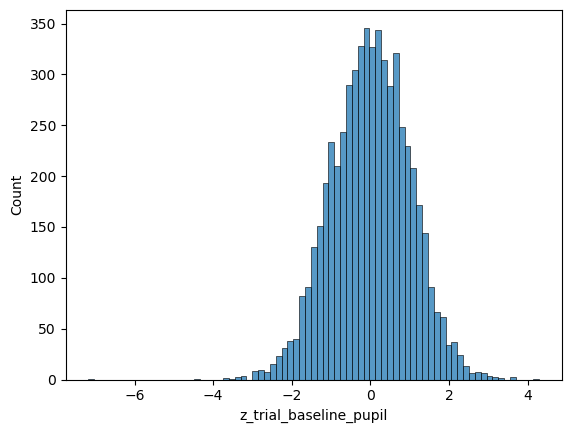

In [6]:
plt.figure()
sns.histplot(long_pupil_task_first_row, x='z_trial_baseline_pupil')
plt.show()

In [13]:
# exclude identifiers given long_pupil_task_first_row
max_abs_z = 3
filter_id = long_pupil_task_first_row.identifier[abs(long_pupil_task.z_trial_baseline_pupil) >= max_abs_z]
filter_id

1430116     42I6EI14.08.0
1705504     4J0VS010.07.0
1816594     4J0VS015.05.0
3435846      9W0DJC5.09.0
4310856     AJA1KZ11.09.0
4526522      BZR5YS5.02.0
5802530     CWYKY212.05.0
5827798     CWYKY213.06.0
6620075     DK88ZQ16.00.0
6677824      DU5ZOC2.05.0
7228191     EPSUO510.07.0
8203890      GB0NP35.06.0
8307201     GB0NP310.01.0
9056017     N0WPBH10.06.0
9058291     N0WPBH10.07.0
9060554     N0WPBH10.08.0
9322567      NQ0XLV6.04.0
9782054     QO4J0410.03.0
9885375     QO4J0414.08.0
10354640     RW8QQ13.01.0
11646132    UP2Q6V11.02.0
12150514     YB70MS1.01.0
12916454     YUVTXN2.02.0
Name: identifier, dtype: object

In [19]:
long_pupil_task = long_pupil_task.loc[~long_pupil_task.identifier.str.contains('|'.join(filter_id)),:]

In [24]:
long_pupil_task.shape

(13205511, 48)

/var/folders/tl/cc74fsf14xd905k20d2d_8940000gq/T/ipykernel_9887/3554894879.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_df['z_trial_baseline_pupil'] = zscore(curr_df['trial_baseline_pupil'])
/var/folders/tl/cc74fsf14xd905k20d2d_8940000gq/T/ipykernel_9887/3554894879.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_df['z_trial_baseline_pupil'] = zscore(curr_df['trial_baseline_pupil'])
/var/folders/tl/cc74fsf14xd905k20d2d_8940000gq/T/ipykernel_9887/3554894879.py:10: SettingWithCopyWarning

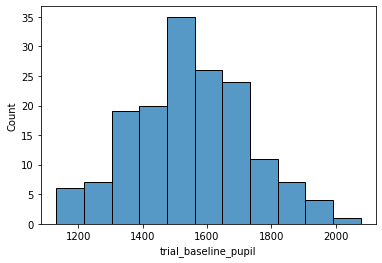

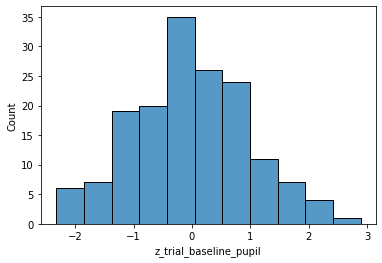

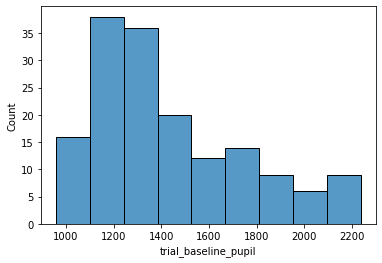

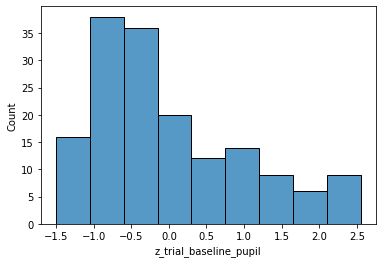

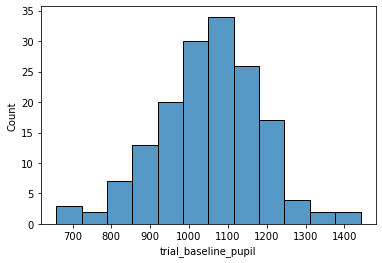

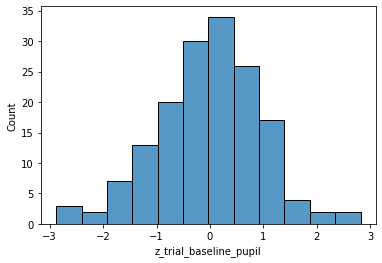

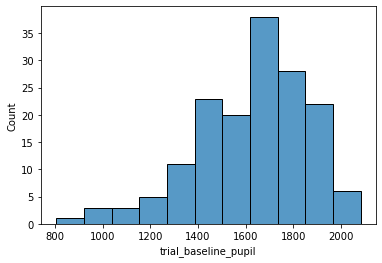

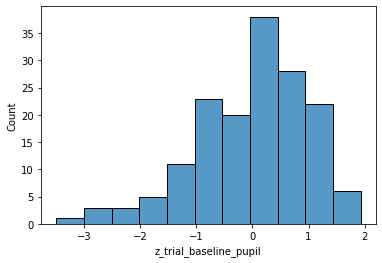

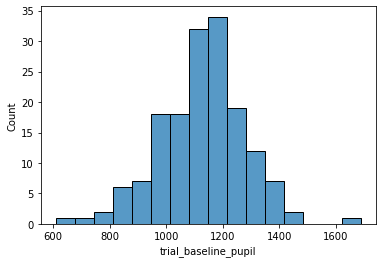

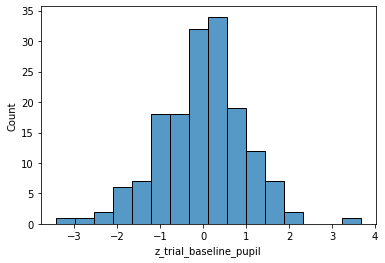

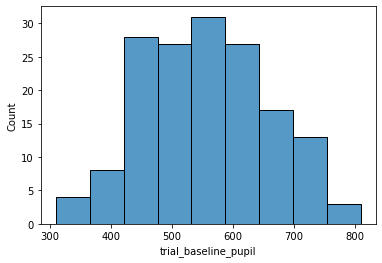

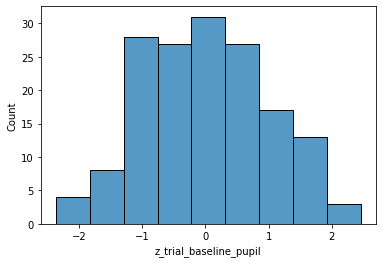

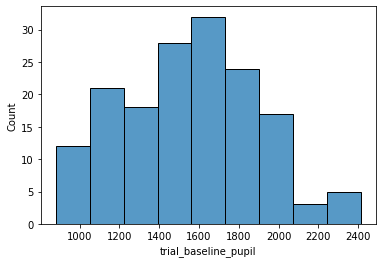

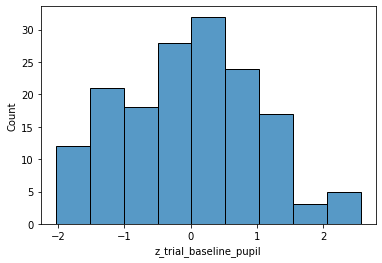

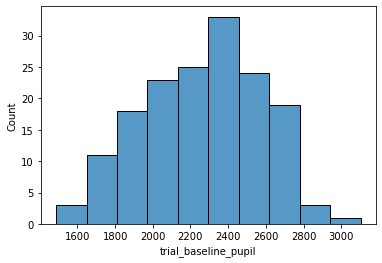

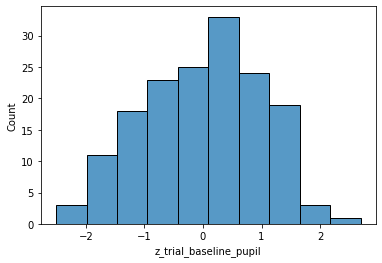

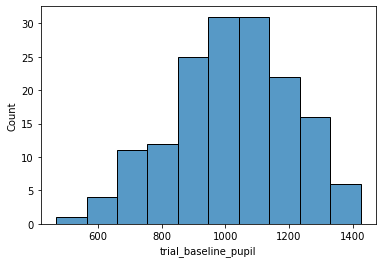

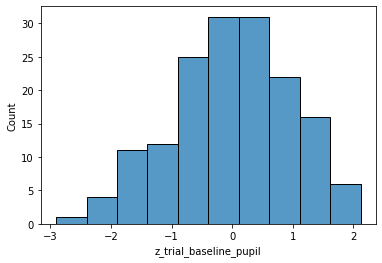

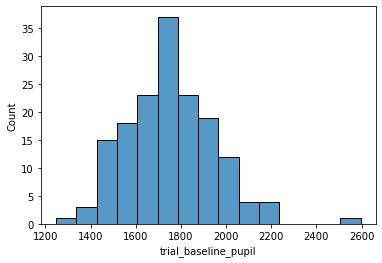

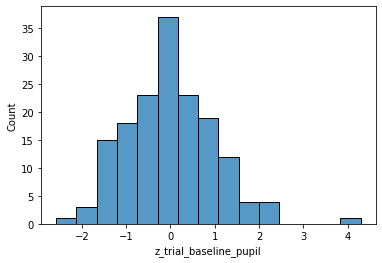

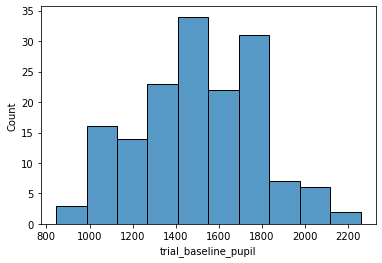

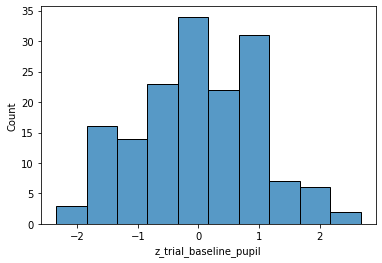

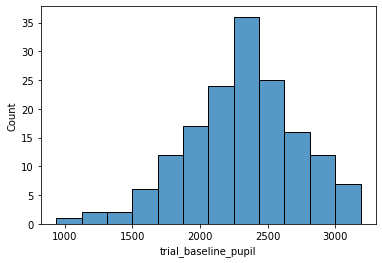

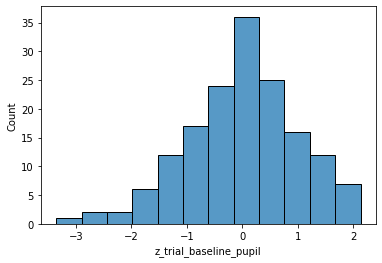

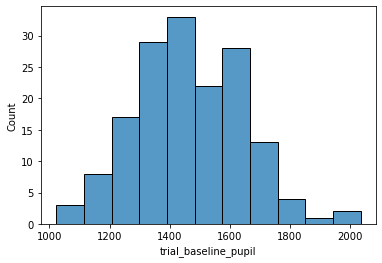

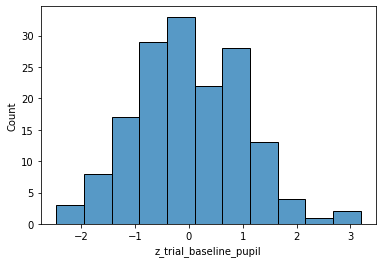

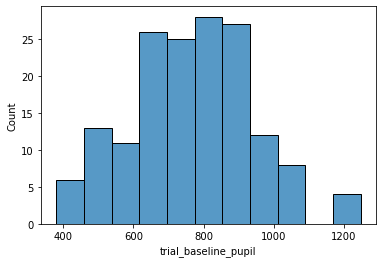

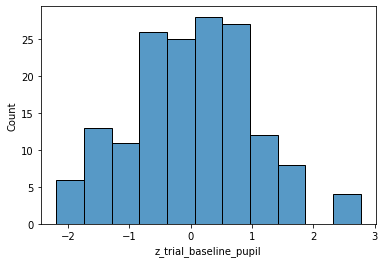

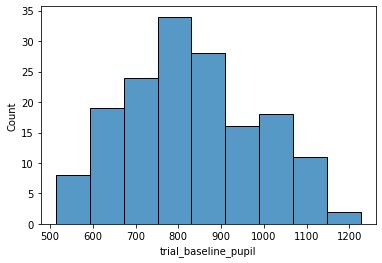

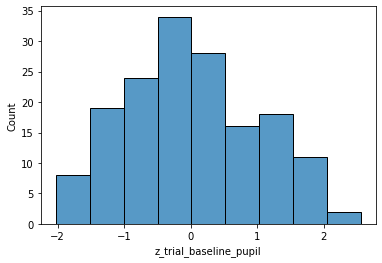

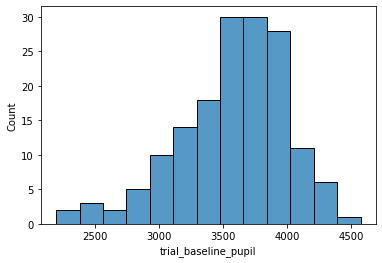

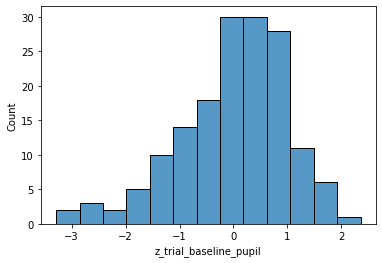

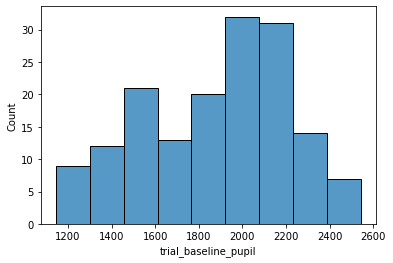

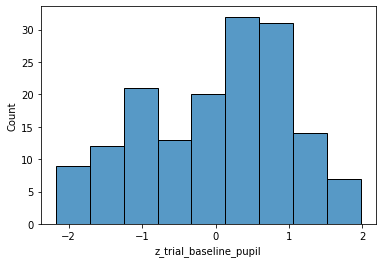

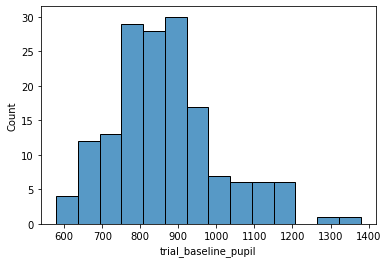

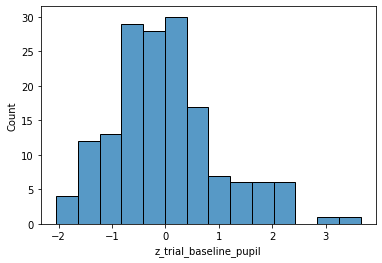

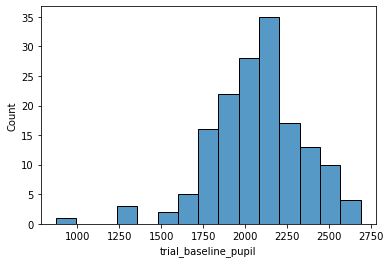

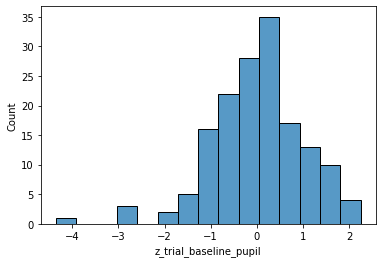

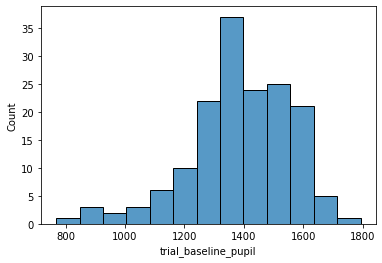

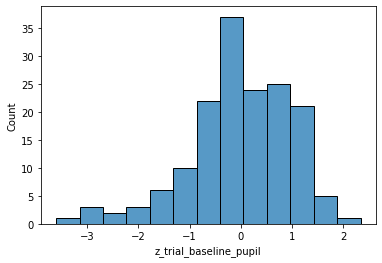

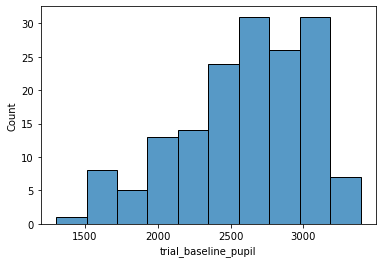

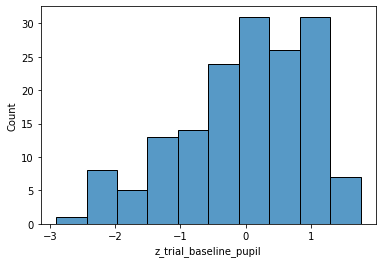

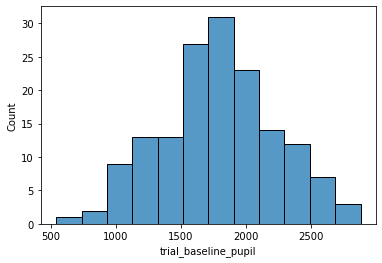

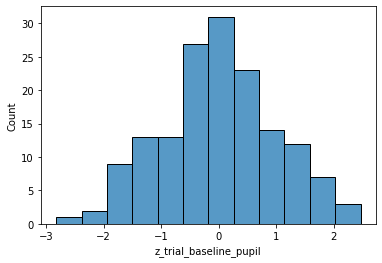

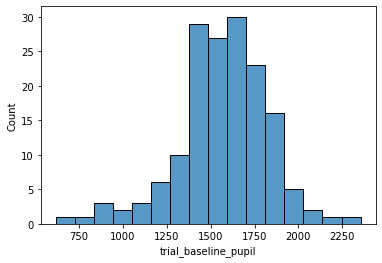

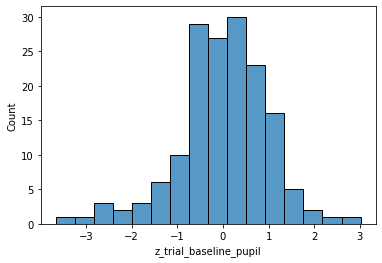

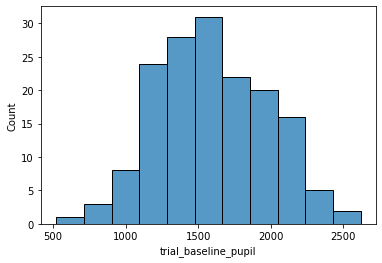

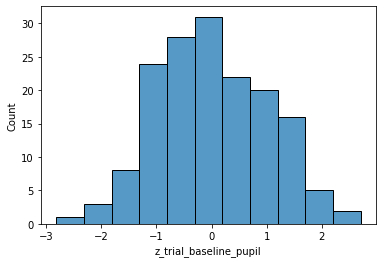

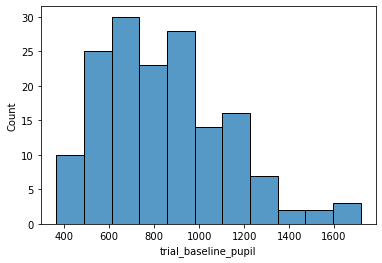

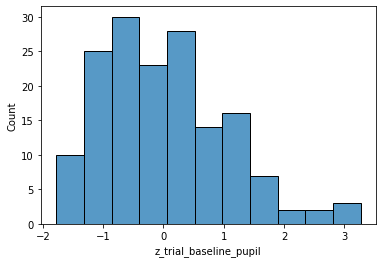

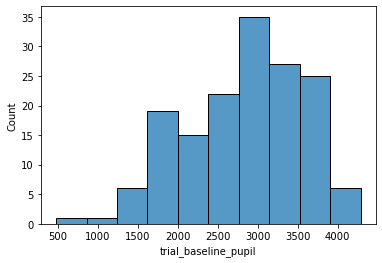

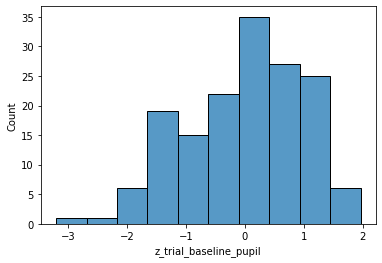

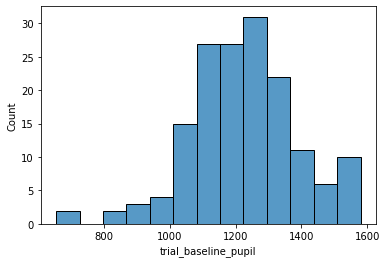

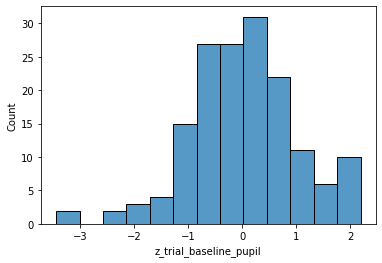

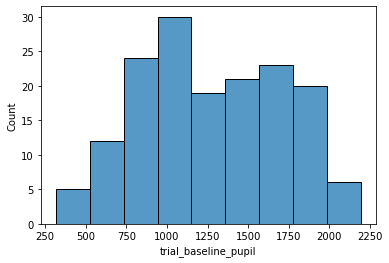

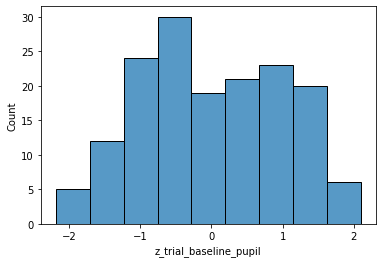

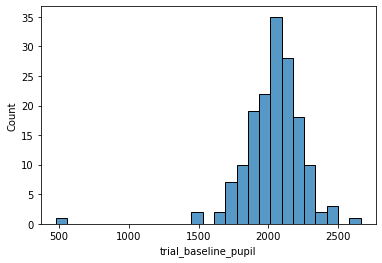

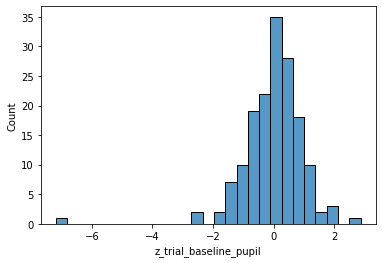

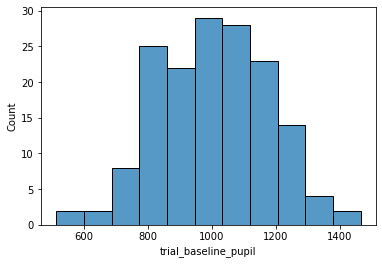

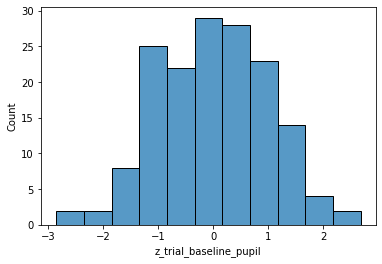

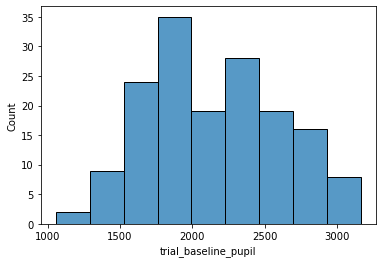

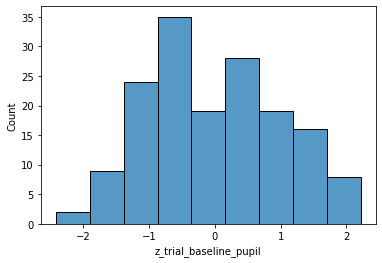

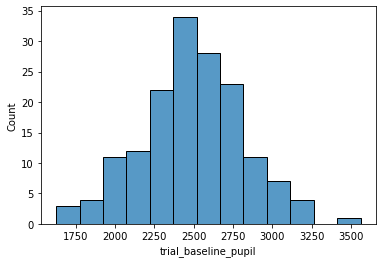

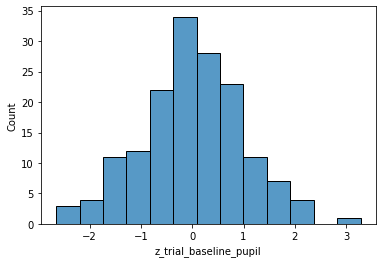

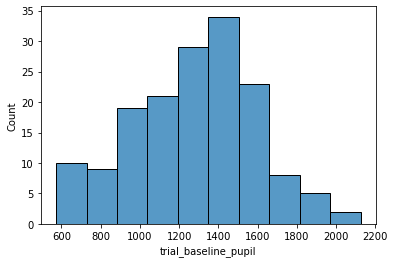

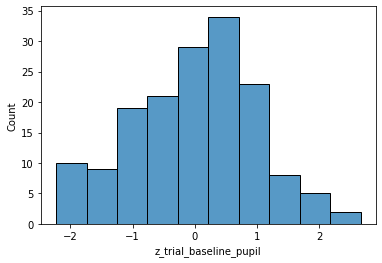

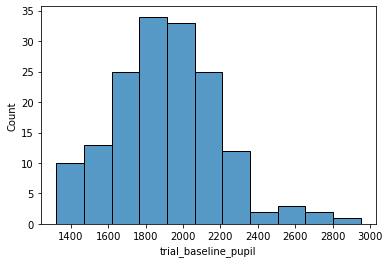

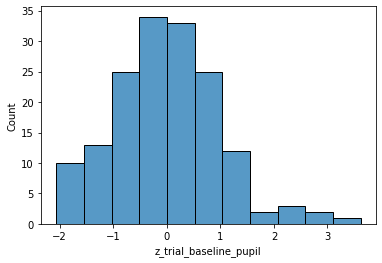

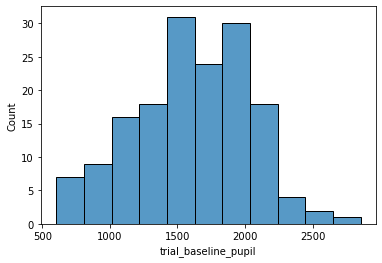

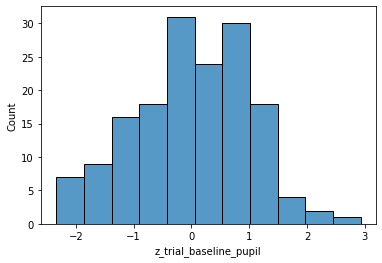

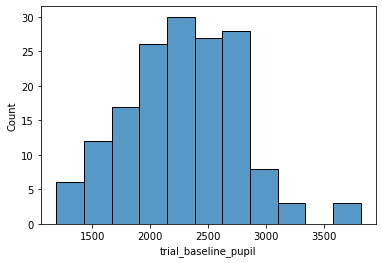

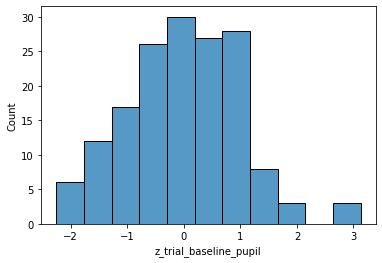

In [47]:
# put this visualizetion towards the end to make sure 
long_pupil_task_first_row = long_pupil_task.groupby(['ID','block','trial']).head(1)
for sub in long_pupil_task_first_row.ID.drop_duplicates():
    curr_df = long_pupil_task_first_row.loc[long_pupil_task_first_row.ID == sub,:]
    plt.figure()
    curr_hist = sns.histplot(curr_df,\
                 x='trial_baseline_pupil')
    curr_fig = curr_hist.get_figure()
    curr_fig.savefig('../../Output/Fig/'+sub+'_trial_baseline.png')
    # zscore
    curr_df['z_trial_baseline_pupil'] = zscore(curr_df['trial_baseline_pupil'])
    plt.figure()
    curr_hist = sns.histplot(curr_df,\
                 x='z_trial_baseline_pupil')
    curr_fig = curr_hist.get_figure()
    curr_fig.savefig('../../Output/Fig/'+sub+'_trial_baseline_z.png')


### Z-score data

Conduct this after the baseline has been extracted from the data

Given the previous analysis, here the z-score is only conducted on the trials
that are still remaining (not sure this is the best way to move forward tho...)

In [25]:
def zscore_func(df):
    '''
    generate zscored pupil size for each df and omit nan. 
    subject/block/trial level normalization depends on the input df
    '''

    if not 'z_smoothed_interp_pupil_corrected' in df.columns:
        df['z_smoothed_interp_pupil_corrected'] = zscore(df['smoothed_interp_pupil_corrected'], nan_policy='omit')
    if not 'z_remove_baseline_smoothed_interp_pupil_corrected' in df.columns:
        df['z_remove_baseline_smoothed_interp_pupil_corrected'] = zscore(df['remove_baseline_smoothed_interp_pupil_corrected'], nan_policy='omit')
    return df


In [29]:
# for now, z-score is conducted within subject
if (not 'z_smoothed_interp_pupil_corrected' in long_pupil_task.columns) or\
    (not 'z_remove_baseline_smoothed_interp_pupil_corrected' in long_pupil_task.columns):
    long_pupil_task = long_pupil_task.groupby(['ID']).apply(zscore_func)
    # long_pupil_task.to_csv('../../Data_All_Cleaned/long_pupil_task.csv')    
else:
    long_pupil_task = pd.read_csv('../../Data_All_Cleaned/long_pupil_task.csv')    

### Exclude trials based on missing data

where more than X% data is not recorded, the whole trial was discarded (have
seen 30% or 40% in the past literature)

Note to myself: needs to understand is_valid calculation better. It seems that
if we use whether smoothed_interp_pupil_corrected is NA vs. use is_valid flag. 

For now, we use smoothed_interp_pupil_corrected, which seems to be a more
lenient signal.

In [42]:
def missing_data_perc_flag(df, percent=0.3, type='flag'):
    '''
    function examining whether there are more than X percent of data missing in a single trial
    return True if the current trial should be excluded, False otherwise
    '''
    if type == 'flag':
        # if df.is_valid.mean() <= 1-percent:
        if df.smoothed_interp_pupil_corrected.isna().mean() > percent:
            return True
        else:
            return False
    if type == 'num':
        # return df.is_valid.mean()
        return df.smoothed_interp_pupil_corrected.isna().mean()


In [43]:
# here I use long_pupil_task as input since we do not care about timestamp or zscore
# if not os.path.exists('../../Data_All_Cleaned/long_pupil_task_timestamp_z.csv'):
missing_data_flag_list_30 = long_pupil_task.groupby(['ID','block','trial']).apply(missing_data_perc_flag, percent=0.3)
missing_data_flag_list_40 = long_pupil_task.groupby(['ID','block','trial']).apply(missing_data_perc_flag, percent=0.4)
missing_data_flag_df_30 = missing_data_flag_list_30.reset_index().rename(columns={0: 'missing_data_flag'})
missing_data_flag_df_40 = missing_data_flag_list_40.reset_index().rename(columns={0: 'missing_data_flag'})

In [44]:
print(missing_data_flag_df_30.missing_data_flag.sum())
print(missing_data_flag_df_30.missing_data_flag.sum() / missing_data_flag_df_30.shape[0])
print(missing_data_flag_df_40.missing_data_flag.sum())
print(missing_data_flag_df_40.missing_data_flag.sum() / missing_data_flag_df_40.shape[0])

8
0.0013990905911157748
8
0.0013990905911157748


In [ ]:
if (not os.path.exists('../../Data_All_Cleaned/missing_data_flag_30.csv')) or (not os.path.exists('../../Data_All_Cleaned/missing_data_flag_40.csv')):
    missing_data_flag_df_30.to_csv('../../Data_All_Cleaned/missing_data_flag_30.csv')    
    missing_data_flag_df_40.to_csv('../../Data_All_Cleaned/missing_data_flag_40.csv')    
else:
    missing_data_flag_df_40 = pd.read_csv('../../Data_All_Cleaned/missing_data_flag_40.csv')    

***for now, we are going to stick to the lenient exclusion criteria - that is, exclude blocks with more than 40% data missing***

this result in an exclusion of 670 trials, which is 11.6% of all the data. 

<span style="color:red">is it a little too many?? in Leong et al.(2021), they only exclude 1.8% of total trials...</span>


In [ ]:
print(missing_data_flag_df_30.missing_data_flag.sum())
print(missing_data_flag_df_30.missing_data_flag.sum() / missing_data_flag_df_30.shape[0])
print(missing_data_flag_df_40.missing_data_flag.sum())
print(missing_data_flag_df_40.missing_data_flag.sum() / missing_data_flag_df_40.shape[0])

965
0.1675347222222222
670
0.11631944444444445


In [47]:
missing_data_flag_df_40_keep = missing_data_flag_df_40.loc[~missing_data_flag_df_40.missing_data_flag,:]
missing_data_flag_df_40_keep['identifier'] = missing_data_flag_df_40_keep['ID'] + missing_data_flag_df_40_keep['block'].astype(str) + missing_data_flag_df_40_keep['trial'].astype(str)
if not 'identifier' in long_pupil_task.columns:
    long_pupil_task['identifier'] = long_pupil_task['ID'] + long_pupil_task['block'].astype(str) + long_pupil_task['trial'].astype(str)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [48]:
long_pupil_task.shape

(13205511, 50)

In [49]:
long_pupil_task = long_pupil_task.loc[long_pupil_task.identifier.isin(missing_data_flag_df_40_keep.identifier),:]

In [50]:
long_pupil_task.shape

(13186253, 50)

total number of participants in the current dataset:  36

total trials in the current dataset:  5710

distribution of conditions among all these rows:
 Risky/Safe     1430
Risky/Risky    1428
Safe/Risky     1427
Safe/Safe      1425
Name: Condition, dtype: int64

the following histogram shows that how many trials each participant has.



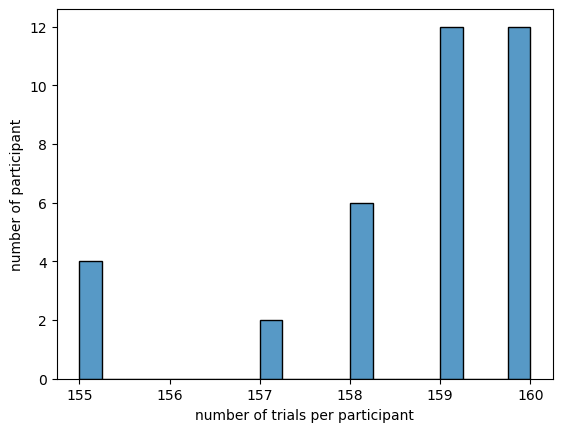

In [51]:
# some descriptive stats for long_pupil_task
long_pupil_task_first_row = long_pupil_task.groupby(['ID','block','trial']).head(1)
print('total number of participants in the current dataset: ', long_pupil_task_first_row.ID.drop_duplicates().shape[0])
print('\ntotal trials in the current dataset: ',long_pupil_task_first_row.shape[0])
print('\ndistribution of conditions among all these rows:\n', long_pupil_task_first_row.Condition.value_counts())
print('\nthe following histogram shows that how many trials each participant has.\n')
ax = sns.histplot(data=long_pupil_task_first_row.ID.value_counts().reset_index(), \
    x='ID', bins=20)
ax.set(xlabel='number of trials per participant', ylabel='number of participant')
plt.show()





<span style="color:red">Note: In missing data flag trial starts at 0 (same as the rest of pupil data).
This is NOT true for behavior data (trial starts at 1)</span>

refer to the Visualization_explore.ipynb file for further exploratory
visualization! 

## Save data

Finally, save our data!

In [52]:
long_pupil_task.to_csv('../../Data_All_Cleaned/long_pupil_task_filtered.csv')